In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
x = np.linspace(0, 10, 100)  # x 轴数据
y1 = np.sin(x)   # 第一条折线 y1 = sin(x)
y2 = np.cos(x)   # 第二条折线 y2 = cos(x)
y3 = np.tan(x)   # 第三条折线 y3 = tan(x)

# 绘制多条折线
plt.plot(x, y1, 'r', label='sin(x)', linewidth=2)  # 红色线
plt.plot(x, y2, 'g', label='cos(x)', linewidth=2)  # 绿色线
plt.plot(x, y3, 'b', label='tan(x)', linewidth=2)  # 蓝色线

# 设置图形属性
plt.title('Hello world')  # 图表标题
plt.xlabel('x')        # x 轴标签
plt.ylabel('y')        # y 轴标签

# 设置 y 轴范围，避免 tan(x) 的值太大导致图形不清晰
plt.ylim(-10, 10)

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

C:\Users\cheng\.conda\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cheng\.conda\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cheng\.conda\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cheng\.conda\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cheng\.conda\envs\helloworld\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968

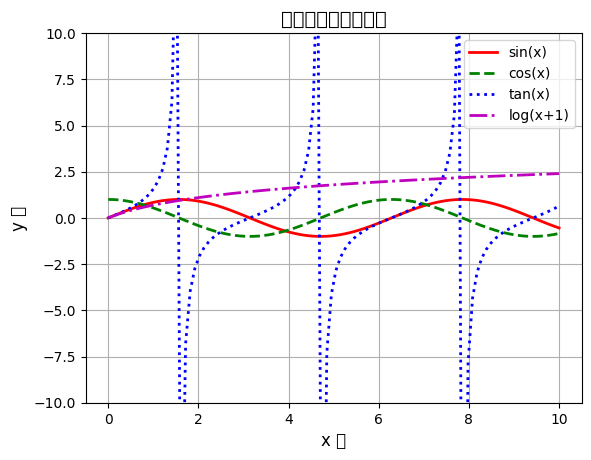

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
x = np.linspace(0, 10, 100)  # x 轴数据

# 多条不同的折线数据
y1 = np.sin(x)               # 第一条折线：y1 = sin(x)
y2 = np.cos(x)               # 第二条折线：y2 = cos(x)
y3 = np.tan(x)               # 第三条折线：y3 = tan(x)
y4 = np.log(x + 1)           # 第四条折线：y4 = log(x+1)

# 绘制多条折线
plt.plot(x, y1, label='sin(x)', color='r', linestyle='-', linewidth=2)  # 红色实线
plt.plot(x, y2, label='cos(x)', color='g', linestyle='--', linewidth=2) # 绿色虚线
plt.plot(x, y3, label='tan(x)', color='b', linestyle=':', linewidth=2)  # 蓝色点划线
plt.plot(x, y4, label='log(x+1)', color='m', linestyle='-.', linewidth=2)  # 品红色划线

# 设置图形标题和标签
plt.title('不同函数的多折线图', fontsize=14)  # 图表标题
plt.xlabel('x 轴', fontsize=12)                # x 轴标签
plt.ylabel('y 轴', fontsize=12)                # y 轴标签

# 设置 y 轴范围，避免 tan(x) 过大的问题
plt.ylim(-10, 10)

# 添加网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of the following families were found: 华文仿宋
findfont: Generic family 'sans-serif' not found because none of 

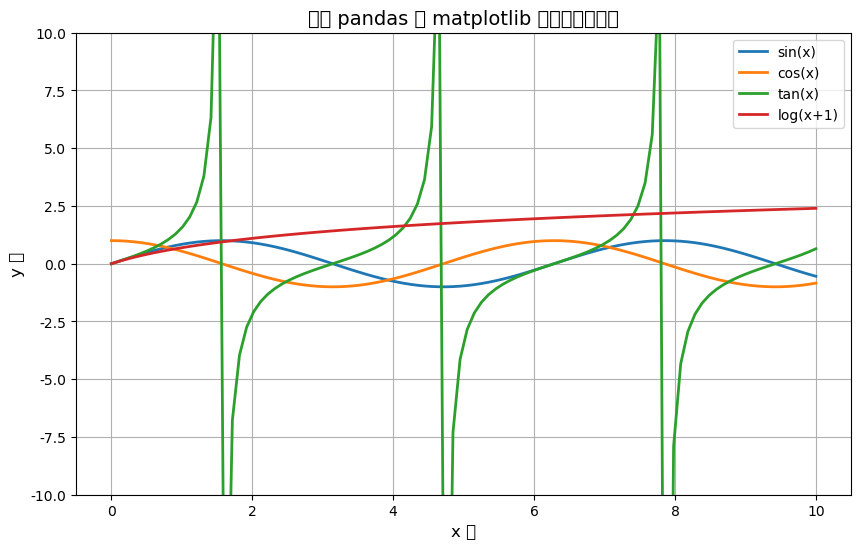

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个时间序列数据
x = np.linspace(0, 10, 100)

# 创建多个不同的函数数据
y1 = np.sin(x)           # 第一条折线：sin(x)
y2 = np.cos(x)           # 第二条折线：cos(x)
y3 = np.tan(x)           # 第三条折线：tan(x)
y4 = np.log(x + 1)       # 第四条折线：log(x+1)

# 将数据放入 pandas DataFrame 中
data = pd.DataFrame({
    'x': x,
    'sin(x)': y1,
    'cos(x)': y2,
    'tan(x)': y3,
    'log(x+1)': y4
})

# 使用 pandas 的 plot 方法绘制多条折线图
plt.figure(figsize=(10, 6))

# 绘制所有列（除了 'x' 列）
data.plot(x='x', y=['sin(x)', 'cos(x)', 'tan(x)', 'log(x+1)'], ax=plt.gca(), linewidth=2)

# 设置图形标题和标签
plt.title('使用 pandas 和 matplotlib 绘制多条折线图', fontsize=14)
plt.xlabel('x 轴', fontsize=12)
plt.ylabel('y 轴', fontsize=12)

# 设置 y 轴范围，避免 tan(x) 过大导致的失真
plt.ylim(-10, 10)

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 2)
y1 = x+10

plt.plot(x, y1)  # 红色实线

plt.show()

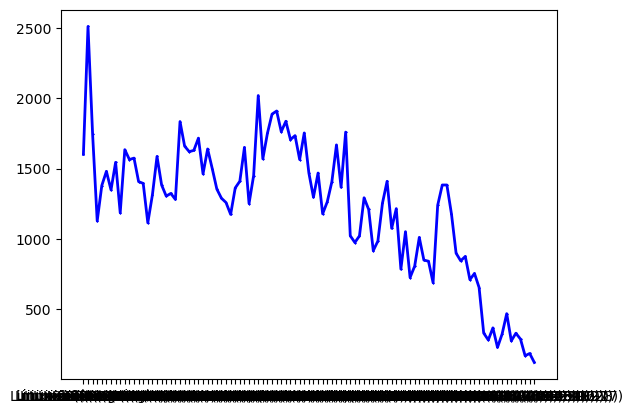

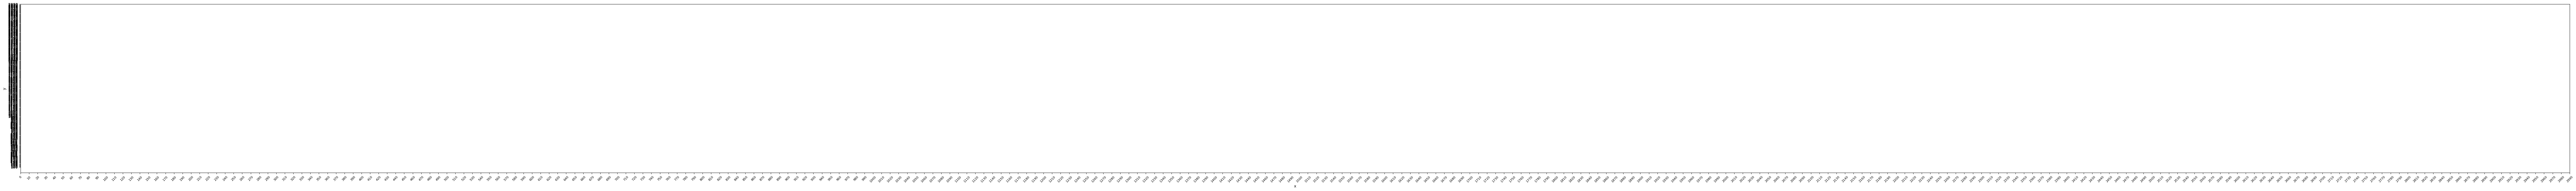

In [4]:
import matplotlib.pyplot as plt

import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('all_kernel_contribute_data.csv')
# 读取单列

# intel 的贡献数据
intel_all = df[df['contributor']=="Intel"]
intel_pure = intel_all[intel_all['kernelversion'] != 'From Apr. 16 2005']
intel_kernelversion = intel_pure['kernelversion']
intel_values = intel_pure['value']

# Plotting the data
plt.plot(intel_kernelversion,intel_values, '-*b', label='intel', markersize=1, linewidth=2)

fig = plt.figure(figsize=(120,8)) 


# Set x and y ticks
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=45)
plt.xticks(range(0,3000,10))  
plt.yticks(range(100, 3000, 10))  # y-axis from 0 to 700 with interval 100

# Add legend, axis labels, and title

plt.xlabel('x')  # x-axis label
plt.ylabel('y')  # y-axis label

# Show the plot
plt.show()

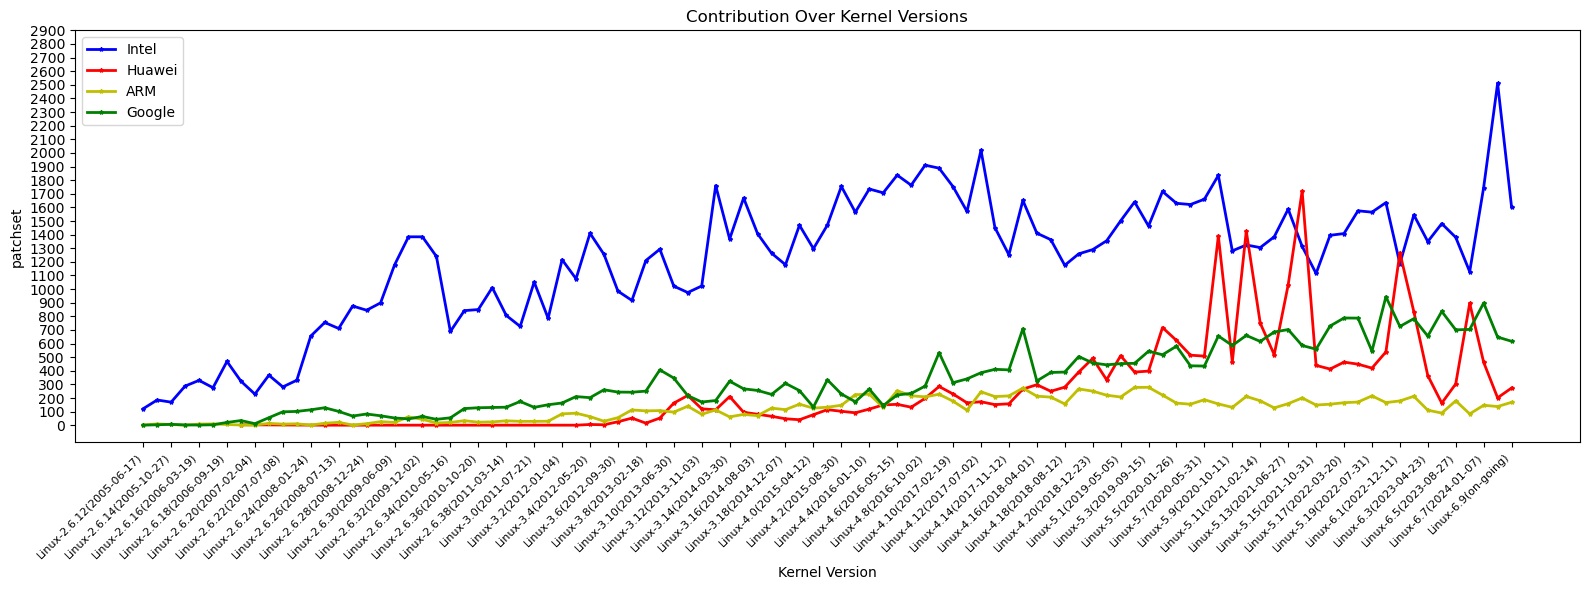

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('all_kernel_contribute_data.csv')

# 筛选 Intel 的贡献数据
intel_all = df[df['contributor'] == "Intel"]
intel_pure = intel_all[intel_all['kernelversion'] != 'From Apr. 16 2005']
intel_kernelversion = intel_pure['kernelversion']
intel_values = intel_pure['value']
# 对数据进行倒序排列
intel_kernelversion = intel_kernelversion[::-1]
intel_values = intel_values[::-1]


# 筛选 Huawei 的贡献数据
huawei_all = df[df['contributor'] == "Huawei"]
huawei_pure = huawei_all[huawei_all['kernelversion'] != 'From Apr. 16 2005']
huawei_kernelversion = huawei_pure['kernelversion']
huawei_values = huawei_pure['value']
# 对数据进行倒序排列
huawei_kernelversion = huawei_kernelversion[::-1]
huawei_values = huawei_values[::-1]

# 筛选 ARM 的贡献数据
arm_all = df[df['contributor'] == "ARM"]
arm_pure = arm_all[arm_all['kernelversion'] != 'From Apr. 16 2005']
arm_kernelversion = arm_pure['kernelversion']
arm_values = arm_pure['value']
# 对数据进行倒序排列
arm_kernelversion = arm_kernelversion[::-1]
arm_values = arm_values[::-1]

# 筛选 Google 的贡献数据
google_all = df[df['contributor'] == "Google"]
google_pure = google_all[google_all['kernelversion'] != 'From Apr. 16 2005']
google_kernelversion = google_pure['kernelversion']
google_values = google_pure['value']
# 对数据进行倒序排列
google_kernelversion = google_kernelversion[::-1]
google_values = google_values[::-1]

# 对数据进行倒序排列
google_kernelversion = google_kernelversion[::-1]
google_values = google_values[::-1]


# 创建图形对象，并设置合适的大小
plt.figure(figsize=(16, 6))  # 增大图形尺寸，给 x 轴更多空间

# 绘制数据
plt.plot(intel_kernelversion, intel_values, '-*b', label='Intel', markersize=3, linewidth=2)
plt.plot(huawei_kernelversion, huawei_values, '-*r', label='Huawei', markersize=3, linewidth=2)
plt.plot(arm_kernelversion, arm_values, '-*y', label='ARM', markersize=3, linewidth=2)
plt.plot(google_kernelversion, google_values, '-*g', label='Google', markersize=3, linewidth=2)


# 设置 x 和 y 轴刻度
plt.tick_params(axis='x', labelsize=8)  # 设置 x 轴的刻度标签大小
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴的刻度标签 45 度，确保标签清晰

# 显示所有 x 轴刻度标签的值（不跳过任何一个）
plt.xticks(range(0, len(intel_kernelversion), 2))  # 显示每个 x 轴刻度标签

# 设置 y 轴的刻度
plt.yticks(range(0, 3000, 100))  # y 轴从 100 到 3000，间隔为 100

# 添加图例、标签和标题
plt.xlabel('Kernel Version')  # x 轴标签
plt.ylabel('patchset')  # y 轴标签
plt.title('Contribution Over Kernel Versions')  # 图表标题
plt.legend(loc='best')  # 添加图例

# 自动调整布局，避免标签重叠
plt.tight_layout()

# 显示图形
plt.show()
